In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
dir_data = 'outputs'
dir_out = 'plots'

In [3]:
#### read methylation data
file_methyl_in = f'{dir_data}/methylation_table_complete.tsv'
df_methyl = pd.read_table(file_methyl_in, header=0, index_col=0, sep='\t', dtype={'in_trios': str, 'has_both_hps': str, 'both_hps_2_reads': str, 'both_hps_3_reads': str})
pd.set_option('display.max_columns', None)
display(df_methyl)
pd.set_option('display.max_columns', 10)

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,repeat_length_h2,repeat_length_h0,mean_repeat_length_h1,mean_repeat_length_h2,mean_repeat_length_h0,read_mean_methyl_lik_h1,read_mean_methyl_lik_h2,read_mean_methyl_lik_h0,num_methyl_reads_h1,num_unmethyl_reads_h1,frac_hap_methyl_h1,num_methyl_reads_h2,num_unmethyl_reads_h2,frac_hap_methyl_h2,num_methyl_reads_h0,num_unmethyl_reads_h0,frac_hap_methyl_h0,xci_num_methyl_reads_h1,xci_num_unmethyl_reads_h1,xci_frac_hap_methyl_h1,xci_num_methyl_reads_h2,xci_num_unmethyl_reads_h2,xci_frac_hap_methyl_h2,xci_num_methyl_reads_h0,xci_num_unmethyl_reads_h0,xci_frac_hap_methyl_h0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample_id,fid,rel,sex,Platform,coverage,Affected,Phenotype,in_trios,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000026,.,NaN,.,NaN,.,"22,10,10,0,2,7,4,2,20,19,20,2,18",.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0,13,0.0,0.095364,-0.045230,-0.019472,0.155381,0.000061,-0.004595,-0.023594,0.038160,0.011138,-0.011087,REACH000026,F0026,Proband,Male,PB,3.22,Yes,1,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000058,.,NaN,.,NaN,"51,51,51,57,51,51,52","3,4,9,10,2,2,7,2,39,8,12,1,17,0,0,1,1,14,29,10...",.,.,0|0|0|0|0|0|0|1|2|32|27|13|7|5|46|27|29|15|3|4...,.,.,"37,37,37,39,37,37,37",.,.,37.285714285714285,.,.,"8,9,11,17,23,5,17",.,.,.,.,.,.,0,7,0.0,.,.,.,.,.,.,0,28,0.0,0.002422,-0.009216,-0.007762,0.073817,0.015720,0.006303,0.055403,-0.038327,-0.011381,0.032498,REACH000058,F0058,Proband,Male,PB,6.19,Yes,1,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000065,.,NaN,.,NaN,30,"9,10",.,.,62|37|36|51|8|2|0|0|0|0|0|7|46|88|91|87|84|66|...,.,.,30,.,.,30.0,.,.,22,.,.,.,.,.,.,0,1,0.0,.,.,.,.,.,.,0,2,0.0,0.252774,0.107933,0.199378,0.002387,0.001311,0.008149,0.012198,-0.000825,-0.002550,-0.030490,REACH000065,F0065,Proband,Male,PB,1.22,Yes,1,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000066,32,"1,12,34","31,43,30","87,0",.,"71,77,1,88",91|95|100|99|96|100|99|98|98|96|96|97|94|99|98...,64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|2|6|2|...,.,31,"30,34,30",.,31.0,31.333333333333332,.,79,"8,42,3",.,1,0,1.0,0,3,0.0,.,.,.,0,3,0.0,1,1,0.5,3,1,0.75,0.243117,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,REACH000066,F0065,Mom,Female,PB,1.61,No,0,TRUE,0.0,1.0,31.333333333333332,31.0,TRUE,0.125,9.030899869919436,26-34 CGG,FALSE,FALSE
REACH000067,.,NaN,.,15,.,"7,0,11,23,55,0,2,3,4,0,0,8,46",.,.,9|14|13|23|14|22|13|13|29|12|20|2|7|5|9|18|6|4...,.,.,.,.,.,.,.,.,11,.,.,.,.,.,.,0,1,0.0,.,.,.,0,1,0.0,1,12,0.07692307692307693,0.245851,0.155945,0.240343,0.002973,0.002622,-0.000228,0.004678,-0.002355,0.011371,-0.027117,REACH000067,F0065,Dad,Male,PB,1.42,No,0,TRUE,.,.,.,.,FALSE,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACH000681,.,5,.,16,"-6,-8,-6,25","3,47,10,23,3,1,9,9,2,17,1,3,0,6,2,16,4,6,14,11...",.,.,0|9|59|2|56|0|0|0|0|0|0|0|0|0|6|0|0|11|0|1|9|0...,.,.,"18,17,18,28",.,.,20.25,.,.,"4,25,5,11",.,.,.,.,.,.,0,4,0.0,0,1,0.0,0,1,0.0,1,31,0.03125,-0.030336,-0.005133,-0.003167,-0.015673,-0.001873,0.015788,0.017784,-0.002266,-0.019622,-0.022165,REACH000681,F0270,Proband,Male,ONT,10.04,Yes,1,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000682,"31,28,.,24","2,63,56,6,31,89,81,3,69,52,66,69,2,17,60,2,78,...","12,14","71,20,2,54,41,43,8,3,7,5,8,58,54,94,57,48,4,84...","30,26,-12","80,73,0,0",0|0|0|9|8|4|3|3|0|0|0|0|21|0|0|0|2|8|0|0|3|5|1...,45|97|100|100|100|100|100|22|89|17|92|100|95|1...,100|100|100|81|100|95|100|100|100|100|100|35|1...,"30,29,.,28","24,25","30,29,16",29.0,24.5,25.0,"8,2,5,3","74,86","70,8,12",0,4,0.0,2,0,1.0,1,2,0.3333333333333333,13,

In [4]:
### read the methylation data of 23 subjects on 163 genes
file_name = f'{dir_data}/methylation_table_select_genes.tsv'
print(file_name)
df_methyl_sample = pd.read_table(file_name, sep='\t', index_col=0, header=0)

pd.set_option('display.max_columns', None)
print('df_methyl_sample:')
print(df_methyl_sample.shape)
display(df_methyl_sample)
pd.set_option('display.max_columns', 10)

outputs/methylation_table_select_genes.tsv
df_methyl_sample:
(3749, 29)


,methyl_h1,methyl_h2,methyl_h0,ps_h1,ps_h2,read_mean_methyl_lik_h1,read_mean_methyl_lik_h2,read_mean_methyl_lik_h0,num_methyl_reads_h1,num_unmethyl_reads_h1,frac_hap_methyl_h1,num_methyl_reads_h2,num_unmethyl_reads_h2,frac_hap_methyl_h2,num_methyl_reads_h0,num_unmethyl_reads_h0,frac_hap_methyl_h0,region_id,num_reads_h1,num_reads_h2,Read count,fmr1_mean_repeat_length_h1,fmr1_mean_repeat_length_h2,fmr1_mean_repeat_length_h0,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,fmr1_mean_large_rep,fmr1_mean_small_rep,repeat_group
REACH000220,.,.,10|12|16|13|4|5|2|4|1|0|0|0|0|0|0|0|1|0|0|0|0|...,.,.,.,.,"2,44,2,22,51,1",.,.,.,.,.,.,1,5,0.16666666666666666,MID1_5UTR,0,0,0,29.000000,29.000000,.,.,.,29.000000,29.000000,26-34 CGG
REACH000234,77|81|91|72|65|59|19|2|0|1|2|0|2|21|28|53|51|7...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,78|99|99|100|99|97|98|95|26|5|1|10|12|5|29|26|...,"10185,10185","10185,10185,10185","32,2","0,51,9","52,7,7,26,32,73",0,2,0.0,1,2,0.3333333333333333,2,4,0.3333333333333333,MID1_5UTR,2,3,5,29.333333,30.600000,.,0.3333333333333333,0.0,30.600000,29.333333,26-34 CGG
REACH000365,.,.,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,.,.,.,.,"0,72,0,73,1,0,2,11",.,.,.,.,.,.,2,6,0.25,MID1_5UTR,0,0,0,30.166667,29.250000,.,.,.,30.166667,29.250000,26-34 CGG
REACH000436_PB,44|93|96|98|97|100|99|98|73|9|2|3|0|11|66|68|7...,98|99|98|93|96|84|38|4|0|0|0|1|4|9|14|81|95|85...,.,"10532334,10532334,10532334,10532334,10532334","10532334,10532334,10532334","39,9,55,2,67","50,0,48",.,2,3,0.4,1,2,0.3333333333333333,.,.,.,MID1_5UTR,5,3,8,23.750000,29.833333,.,0.3333333333333333,0.4,29.833333,23.750000,≤25 CGG
REACH000451,.,0|0|0|0|0|9|2|0|0|0|0|0|0|0|0|0|1|1|1|0|0|0|0|...,82|95|98|97|82|82|62|72|33|14|32|56|29|5|3|4|5...,.,10185,.,0,"53,2,43,0,1,53,79,0,89",.,.,.,0,1,0.0,4,5,0.4444444444444444,MID1_5UTR,0,1,1,28.800000,49.400000,.,0.0,.,49.400000,28.800000,≥35 CGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACH000518,0|0|1|0|0|0|13|0|7|11|0|0|0|6|0|0|0|0|0|0|0|4|...,1|10|4|75|1|0|1|0|0|0|1|1|60|0|0|8|2|0|0|0|0|1...,0|100|14|98|98|98|0|100|96|0|100|100|0|5|0|1|1...,"10185,10185,10185,10185","10185,10185","3,4,61,13","8,12","32,5,10,7,70,7,17,2",1,3,0.25,0,2,0.0,1,7,0.125,RAB39B_5UTR,4,2,6,35.000000,29.444444,28.5,0.25,0.0,35.000000,29.444444,≥35 CGG
REACH000519,7|0|3|0|0|0|6|41|0|0|0|3|0|0|0|0|1|0|0|0|0|2|0...,1|68|41|2|1|0|79|82|0|64|4|2|23|0|0|5|0|3|2|0|...,100|53|0|0|0|0|3|14|0|0|2|8|0|40|0|2|1|0|29|0|...,10185,10185,2,17,"8,17,53,45,52,11,2,59,16,11,29,55",0,1,0.0,0,1,0.0,4,8,0.3333333333333333,RAB39B_5UTR,1,1,2,35.000000,20.833333,27.0,0.0,0.0,35.000000,20.833333,≥35 CGG
REACH000547,33|0|5|23|59|96|3|98|0|2|30|14|18|1|16|38|11|5...,100|55|92|100|99|45|86|99|99|91|99|100|100|100...,0|0|1|29|8|0|0,"12790,12790,12790,12790,12790,12790,12790","12790,12790,12790","16,36,64,47,2,9,75","73,2,22",5,2,5,0.2857142857142857,1,2,0.3333333333333333,0,1,0.0,RAB39B_5UTR,7,3,10,28.000000,33.750000,.,0.3333333333333333,0.2857142857142857,33.750000,28.000000,26-34 CGG
REACH000561,.,.,7|65|0|0|0|0|7|0|0|0|0|0|0|0|9|0|0|0|0|1|2|57|...,.,.,.,.,"8,44,60,80,76,81,58,59,52,47,12",.,.,.,.,.,.,7,4,0.6363636363636364,RAB39B_5UTR,0,0,0,28.250000,49.111111,.,.,.,49.111111,28.250000,≥35 CGG


In [5]:
def format_sci_notation(num):
    base, exp = f"{num:.1e}".split('e')
    exp = int(exp)
    superscript = ''.join("⁰¹²³⁴⁵⁶⁷⁸⁹"[int(d)] if d.isdigit() else '⁻' for d in str(exp))
    return f"{base} × 10{superscript}"
print(format_sci_notation(1.2e-5))  # Output: 1.0 × 10⁵

1.2 × 10⁻⁵


/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


bins: [15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5
 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5 42.5
 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
plots/dist_num_repeats_fromTable.png


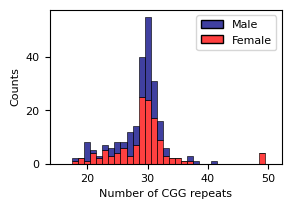

In [6]:
### distribution of CGG repeat size

### set female subjects
df_methyl_fm = df_methyl.loc[(df_methyl.sex=='Female')&(df_methyl.in_trios=='TRUE')].copy()
df_methyl_fm['num_reads_h1'] = df_methyl_fm.apply(lambda row: int(row.num_methyl_reads_h1) + int(row.num_unmethyl_reads_h1) if row.num_methyl_reads_h1!='.' else 0, axis=1)
df_methyl_fm['num_reads_h2'] = df_methyl_fm.apply(lambda row: int(row.num_methyl_reads_h2) + int(row.num_unmethyl_reads_h2) if row.num_methyl_reads_h2!='.' else 0, axis=1)

df_plt_fm = pd.DataFrame()
for idx, row in df_methyl_fm.iterrows():
    sample = idx
    for hp in ['h1', 'h2']:
        if row[f'mean_repeat_length_{hp}'] != '.':
            mean_rep = row[f'mean_repeat_length_{hp}']
            num_reads = row[f'num_reads_{hp}']
            df_tmp = pd.DataFrame({'subject_id': [idx], 'haplotype': [hp], 'sex': ['Female'], f'mean_repeat_length': [mean_rep], f'num_reads': [num_reads]})
            df_plt_fm = pd.concat([df_plt_fm, df_tmp], ignore_index=True)

# set male subjects
df_methyl_m = df_methyl.loc[(df_methyl.sex=='Male')&(df_methyl.in_trios=='TRUE')].copy()
df_methyl_m = df_methyl_m.loc[(df_methyl_m.num_methyl_reads_h1!='.') | (df_methyl_m.num_methyl_reads_h2!='.') | (df_methyl_m.num_methyl_reads_h0!='.')]
df_methyl_m['repeat_lengths'] = df_methyl_m.apply(lambda row: ','.join([x for x in [row.repeat_length_h1, row.repeat_length_h2, row.repeat_length_h0] if x!='.']), axis=1)
df_methyl_m['mean_repeat_length'] = df_methyl_m.repeat_lengths.map(lambda x: np.mean([int(xx) for xx in x.split(',') if xx!='.' and xx!='']))
df_methyl_m['num_methyl_reads'] = df_methyl_m.apply(lambda row: np.sum([int(x) for x in [row.num_methyl_reads_h1, row.num_methyl_reads_h2, row.num_methyl_reads_h0] if x!='.']), axis=1)
df_methyl_m['num_unmethyl_reads'] = df_methyl_m.apply(lambda row: np.sum([int(x) for x in [row.num_unmethyl_reads_h1, row.num_unmethyl_reads_h2, row.num_unmethyl_reads_h0] if x!='.']), axis=1)
df_methyl_m['num_reads'] = df_methyl_m['num_methyl_reads'] + df_methyl_m['num_unmethyl_reads']
df_methyl_m['subject_id'] = df_methyl_m.index
df_methyl_m['haplotype'] = 'hm'
df_plt_m = df_methyl_m[['subject_id', 'haplotype', 'sex', 'mean_repeat_length', 'num_reads']]

df_plt = pd.concat([df_plt_fm, df_plt_m], ignore_index=True)
df_plt['mean_repeat_length'] = df_plt['mean_repeat_length'].astype(float)

FS = 8
bins = np.linspace(15,50,50-15+1) + .5
print(f'bins: {bins}')
plt.figure(figsize=(3, 2))
ax = sb.histplot(data=df_plt, x='mean_repeat_length', bins=bins, hue='sex', hue_order=['Male', 'Female'], palette=['navy', 'red'], multiple='stack', edgecolor='black')
sb.move_legend(ax, loc='best', title='', fontsize=FS)
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Counts', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_out}/dist_num_repeats_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.000008
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   22
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                   1.000
Time:                        12:01:26   Log-Likelihood:            -0.00017633
converged:                      False   LL-Null:                       -11.791
Covariance Type:            nonrobust   LLR p-value:                 7.573e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7261.7514   5.66e+04     -0.128      0.898   -1.18e+05    1.04e+05
x1          1.006e+04   7.83e+04      0.128      0.898   -1.43e+0

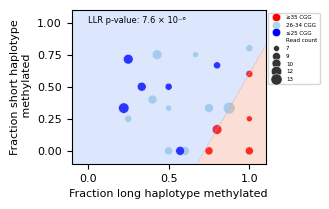

In [7]:
### plot classification of ≥35 with other groups in terms of large vs small haplotypes
import statsmodels.api as sm

df_methyl_plt = df_methyl.loc[(df_methyl.has_both_hps=='TRUE') & (df_methyl.both_hps_3_reads=='TRUE')].copy()
df_methyl_plt['Read count'] = (df_methyl_plt.num_methyl_reads_h1.astype(int) + df_methyl_plt.num_unmethyl_reads_h1.astype(int) + 
                              df_methyl_plt.num_methyl_reads_h2.astype(int) + df_methyl_plt.num_unmethyl_reads_h2.astype(int))

col = 'frac_hap_methyl_h1'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_h2'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_large_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_small_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display(df_methyl_plt)
#display(df_methyl_plt.loc[df_methyl_plt.repeat_group=='≥35 CGG'])
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

# Logistic regression
X = np.array(df_methyl_plt[['frac_hap_methyl_large_rep', 'frac_hap_methyl_small_rep']])
X_with_intercept = sm.add_constant(X) # Add intercept (statsmodels doesn't add it automatically)
y = np.array(df_methyl_plt.repeat_group.map(lambda x: 1 if x == '≥35 CGG' else 0)) # Class labels: 0 and 1

# Fit logistic regression using statsmodels
model = sm.Logit(y, X_with_intercept)
result = model.fit()

# Summary includes p-values
print(result.summary())

# Create a grid of values
xx, yy = np.meshgrid(np.linspace(min(X[:, 0].min() - 0.1, -.1), max(X[:, 0].max() + 0.1, 1.1), 300),
                     np.linspace(min(X[:, 1].min() - 0.1, -.1), max(X[:, 1].max() + 0.1, 1.1), 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_with_const = sm.add_constant(grid)

# Predict probabilities for each point in the grid
probs = result.predict(grid_with_const).reshape(xx.shape)

FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_methyl_plt, x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', 
               hue='repeat_group', hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red',  'lightblue', 'blue'], size='Read count') #, hue='subject', size='num_reads', sizes=(5,20))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.3)
plt.text(x=.0, y=1, s=f'LLR p-value: {format_sci_notation(result.llr_pvalue)}', fontsize=FS-2)
plt.legend(title = '', loc='upper left', bbox_to_anchor=(1, 1), 
           handles=plt.gca().legend_.legend_handles[1:], fontsize=FS-4, title_fontsize=FS-4) #title = 'binomial phred'
plt.xlabel('Fraction long haplotype methylated', fontsize=FS)
plt.ylabel('Fraction short haplotype\n methylated', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
fig_name = f'{dir_out}/frac_hap_methyl_h1_vs_h2_logid_classify.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

stats model XCI:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9515
Date:                Tue, 24 Jun 2025   Prob (F-statistic):              0.335
Time:                        12:01:31   Log-Likelihood:                 52.359
No. Observations:                  44   AIC:                            -100.7
Df Residuals:                      42   BIC:                            -97.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const    

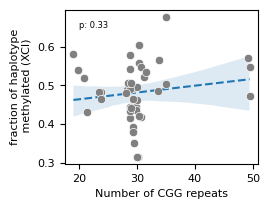

stats model FMR1 full:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     11.63
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           9.98e-05
Time:                        12:01:32   Log-Likelihood:                0.82912
No. Observations:                  44   AIC:                             4.342
Df Residuals:                      41   BIC:                             9.694
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
con

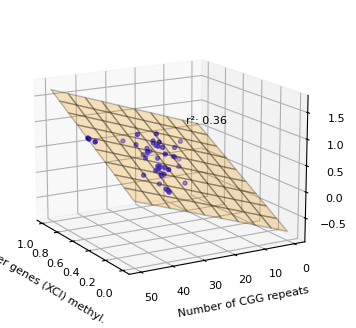

plots/FMR1_methyl_vs_XCI_methyl_select_genes.png


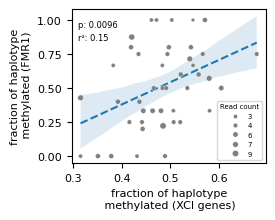

plots/FMR1_methyl_vs_CGG_repeats_select_genes.png


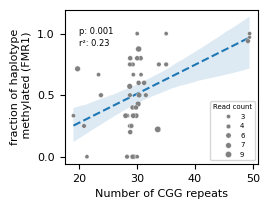

In [8]:
### compute XCI methylation (average of multiple genes) as a function of CGG repeat
samples_plt = ['REACH000561', 'REACH000453', 'REACH000451', 'REACH000479', 'REACH000518', 'REACH000519', 
                'REACH000234', 'REACH000365', 'REACH000436_PB', 'REACH000616', 'REACH000628', 'REACH000672', 'REACH000674', 
                'REACH000702', 'REACH000107', 'REACH000404', 'REACH000417', 'REACH000435', 'REACH000482', 'REACH000510', 
                'REACH000547', 'REACH000581', 'REACH000220']

df_hps = pd.DataFrame()
for sample_id in samples_plt:
    #print(sample_id)
    df_plt = df_methyl_sample.loc[sample_id,:].copy()
    df_plt_xci = df_plt.loc[(df_plt.num_reads_h1>=3) & (df_plt.num_reads_h2>=3) & (df_plt.region_id!='FMR1_5UTR')].copy()
    df_plt_fmr1 = df_plt.loc[df_plt.region_id=='FMR1_5UTR'].copy()
    for hp in ['h1', 'h2']:
        num_methyl_xci = df_plt_xci[f'num_methyl_reads_{hp}'].astype(int).sum()
        num_unmethyl_xci = df_plt_xci[f'num_unmethyl_reads_{hp}'].astype(int).sum()
        frac_hap_methyl_xci = df_plt_xci[f'frac_hap_methyl_{hp}'].astype(float).mean()
        
        num_methyl_fmr1 = df_plt_fmr1[f'num_methyl_reads_{hp}'].astype(int).sum()
        num_unmethyl_fmr1 = df_plt_fmr1[f'num_unmethyl_reads_{hp}'].astype(int).sum()
        frac_hap_methyl_fmr1 = df_plt_fmr1[f'frac_hap_methyl_{hp}'].astype(float).mean()
        
        fmr1_mean_repeat_length = df_plt_xci[f'fmr1_mean_repeat_length_{hp}'].values[0]
        repeat_group = df_plt_xci[f'repeat_group'].values[0]
        df_tmp = pd.DataFrame({'subject_id': [sample_id], 'haplotype': [hp], 
                               'num_methyl_xci': [num_methyl_xci], 'num_unmethyl_xci': [num_unmethyl_xci], 
                               'num_tot_reads_xci': [num_methyl_xci + num_unmethyl_xci], 
                               'num_methyl_fmr1': [num_methyl_fmr1], 'num_unmethyl_fmr1': [num_unmethyl_fmr1], 
                               'num_tot_reads_fmr1': [num_methyl_fmr1 + num_unmethyl_fmr1], 
                               f'frac_hap_methyl_xci': [frac_hap_methyl_xci],
                               f'frac_hap_methyl_fmr1': [frac_hap_methyl_fmr1],
                               'fmr1_mean_repeat_length': fmr1_mean_repeat_length, 'repeat_group': repeat_group})
        df_hps = pd.concat([df_hps, df_tmp], ignore_index=True)

### exclude the skewed XCI subject from associations
df_hps_rmol = df_hps.loc[df_hps.subject_id!='REACH000479'].copy()

### OLS: XCI vs CGG repeat
X = pd.DataFrame(df_hps_rmol.fmr1_mean_repeat_length)
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_hps_rmol.frac_hap_methyl_xci.tolist())
model_sm_xci = sm.OLS(y, X_const).fit()
r2 = model_sm_xci.rsquared
pval_rep_length_xci = model_sm_xci.pvalues['fmr1_mean_repeat_length']
# Get summary
print('stats model XCI:')
print(model_sm_xci.summary())
#print(f'p-values: {model_sm_xci.pvalues}')

### plot: XCI ~ CGG
FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_hps_rmol, x='fmr1_mean_repeat_length', y='frac_hap_methyl_xci', color='gray', zorder=2)
sb.regplot(data=df_hps_rmol, x='fmr1_mean_repeat_length', y='frac_hap_methyl_xci', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5, zorder=1)) #, color='red'

x_t = 20
y_t = .65
plt.text(x_t, y_t, f'p: {pval_rep_length_xci:.2f}', fontsize=FS-2, ha='left')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (XCI)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_out}/XCI_methylation_vs_CGGrepeats_select_genes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

####################################################################################
### multi variate linear model: FMR1 ~ XCI + CGG repeat
X = pd.DataFrame(df_hps_rmol[['frac_hap_methyl_xci', 'fmr1_mean_repeat_length']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_hps_rmol.frac_hap_methyl_fmr1.tolist())
model_sm_fmr1 = sm.OLS(y, X_const).fit()
r2_full = model_sm_fmr1.rsquared
rss_full = np.sum(model_sm_fmr1.resid ** 2)
pval_xci_methyl = model_sm_fmr1.pvalues['frac_hap_methyl_xci']
pval_rep_length = model_sm_fmr1.pvalues['fmr1_mean_repeat_length']
print('stats model FMR1 full:')
print(model_sm_fmr1.summary())

x_plane = np.linspace(0, 1, 10)  # Define grid for the plane
y_plane = np.linspace(0, 50, 10)
a = model_sm_fmr1.params.frac_hap_methyl_xci
b = model_sm_fmr1.params.fmr1_mean_repeat_length
c = model_sm_fmr1.params.const
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = a * x_plane + b * y_plane + c  # Compute corresponding z values

### single variate linear model: FMR1 ~ XCI
X = pd.DataFrame(df_hps_rmol[['frac_hap_methyl_xci']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_hps_rmol.frac_hap_methyl_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
### compute partial r2 based on full model for the other variable not present in this model
# Partial R² = (RSS_reduced - RSS_full) / RSS_reduced
rss_reduced = np.sum(model_sm.resid ** 2)
partial_r2_rep_length = (rss_reduced - rss_full) / rss_reduced
print(f'partial_r2_rep_length: {partial_r2_rep_length}')
# Get summary
print('stats model partial with XCI only:')
print(model_sm.summary())

### single variate linear model: FMR1 ~ CGG repeat
X = pd.DataFrame(df_hps_rmol[['fmr1_mean_repeat_length']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_hps_rmol.frac_hap_methyl_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
### compute partial r2 based on full model for the other variable not present in this model
# Partial R² = (RSS_reduced - RSS_full) / RSS_reduced
rss_reduced = np.sum(model_sm.resid ** 2)
partial_r2_xci_methyl = (rss_reduced - rss_full) / rss_reduced
print(f'partial_r2_xci_methyl: {partial_r2_xci_methyl}')
# Get summary
print('stats model partial with CGG only:')
print(model_sm.summary())
####################################################################################

####################################################################################
FS = 8
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_hps_rmol.frac_hap_methyl_xci.tolist(), df_hps_rmol.fmr1_mean_repeat_length.tolist(), df_hps_rmol.frac_hap_methyl_fmr1, color='blue', label='Data Points', s=8)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.25, color='orange', label='Fitted Plane', edgecolor='black')
x_t =0.8 ; y_t = 10; z_t = 0.8
ax.text(x_t, y_t, z_t, f'r²: {r2_full:.2f}', fontsize=FS) # "⁰¹²³⁴⁵⁶⁷⁸⁹" superscripts are copied from here
ax.set_xlabel('Other genes (XCI) methyl.', fontsize=FS)
ax.set_ylabel('Number of CGG repeats', fontsize=FS)
ax.set_zlabel('FMR1 methyl.', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
ax.tick_params(axis='z', labelsize=FS)
ax.set_title('')
ax.view_init(elev=15, azim=150)
fig_name = f'{dir_out}/3D_FMR1_methyl_vs_XCI_methyl_and_CGG_repeat_select_genes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', pad_inches=.3, dpi=1200)
plt.show()
plt.close()


plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_hps_rmol, x='frac_hap_methyl_xci', y='frac_hap_methyl_fmr1', color='gray', size='num_tot_reads_fmr1', sizes=(7,20), zorder=2)
sb.regplot(data=df_hps_rmol, x='frac_hap_methyl_xci', y='frac_hap_methyl_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5, zorder=1))  # `ci` specifies the confidence interval percentage
x_t =0.31 ; y_t = 0.95
plt.text(x_t, y_t, f'p: {pval_xci_methyl:.4f}', fontsize=FS-2, ha='left')
plt.text(x_t, y_t-.1, f'r²: {partial_r2_xci_methyl:.2f}', fontsize=FS-2, ha='left')
plt.legend(title='Read count', loc='lower right', bbox_to_anchor=(1, 0), fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('fraction of haplotype\n methylated (XCI genes)', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_out}/FMR1_methyl_vs_XCI_methyl_select_genes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()


df_jitter = df_hps_rmol.copy()
df_jitter.loc[(df_jitter.subject_id=='REACH000451')&(df_jitter.haplotype=='h2'), ['frac_hap_methyl_fmr1']] = .97
df_jitter.loc[(df_jitter.subject_id=='REACH000561')&(df_jitter.haplotype=='h2'), ['frac_hap_methyl_fmr1']] = .94
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_jitter, x='fmr1_mean_repeat_length', y='frac_hap_methyl_fmr1', color='gray', size='num_tot_reads_fmr1', sizes=(7,20), zorder=2)
sb.regplot(data=df_hps_rmol, x='fmr1_mean_repeat_length', y='frac_hap_methyl_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5, zorder=1))  # `ci` specifies the confidence interval percentage
x_t =20 ; y_t = 1
plt.text(x_t, y_t, f'p: {pval_rep_length:.3f}', fontsize=FS-2, ha='left')
plt.text(x_t, y_t-.1, f'r²: {partial_r2_rep_length:.2f}', fontsize=FS-2, ha='left')
plt.legend(title='Read count', loc='lower right', bbox_to_anchor=(1, 0), fontsize=FS-3, title_fontsize=FS-3) #handles=plt.gca().legend_.legend_handles[num_subjects+3:],
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_out}/FMR1_methyl_vs_CGG_repeats_select_genes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


plots/haplotype_readFrac_methylation_vs_repeats_FMR1_MALES_fromTable.png


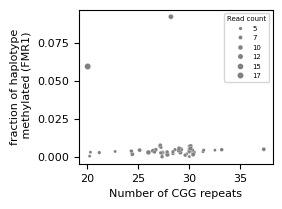

In [9]:
df_methyl_plt = df_methyl.loc[(df_methyl.sex=='Male')&(df_methyl.in_trios=='TRUE')].copy()
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_methyl_reads_h1!='.') | (df_methyl_plt.num_methyl_reads_h2!='.') | (df_methyl_plt.num_methyl_reads_h0!='.')]
df_methyl_plt['repeat_lengths'] = df_methyl_plt.apply(lambda row: ','.join([x for x in [row.repeat_length_h1, row.repeat_length_h2, row.repeat_length_h0] if x!='.']), axis=1)
df_methyl_plt['mean_repeat_length'] = df_methyl_plt.repeat_lengths.map(lambda x: np.mean([int(xx) for xx in x.split(',') if xx!='.' and xx!='']))
df_methyl_plt['num_methyl_reads'] = df_methyl_plt.apply(lambda row: np.sum([int(x) for x in [row.num_methyl_reads_h1, row.num_methyl_reads_h2, row.num_methyl_reads_h0] if x!='.']), axis=1)
df_methyl_plt['num_unmethyl_reads'] = df_methyl_plt.apply(lambda row: np.sum([int(x) for x in [row.num_unmethyl_reads_h1, row.num_unmethyl_reads_h2, row.num_unmethyl_reads_h0] if x!='.']), axis=1)
df_methyl_plt['num_reads'] = df_methyl_plt['num_methyl_reads'] + df_methyl_plt['num_unmethyl_reads']
df_methyl_plt['frac_methyl'] = df_methyl_plt['num_methyl_reads'] / (df_methyl_plt['num_methyl_reads'] + df_methyl_plt['num_unmethyl_reads'])
### using 4 as a read count threshold cause there is only one haplotype here and we are using all phased and unphased reads, so we can be more stringent
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_reads>=4)]

### jitter methylation randomly so the points don't fall onto each other
np.random.seed(42)  # Set the seed
rnd = np.random.normal(loc=0, scale=1, size=df_methyl_plt.shape[0])  # Mean 0, std dev 1
eps = 0.002
df_methyl_plt['frac_methyl'] = df_methyl_plt['frac_methyl'] + (rnd + np.abs(np.min(rnd))) * eps

FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_methyl_plt, x='mean_repeat_length', y='frac_methyl', color='gray', size='num_reads', sizes=(5,20))
plt.legend(title='Read count', loc='upper right', bbox_to_anchor=(1, 1), fontsize=FS-3, title_fontsize=FS-3)

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_out}/haplotype_readFrac_methylation_vs_repeats_FMR1_MALES_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

REACH000561
df_plt:


(55, 30)

plots/chrX_figs/chrX_genes_frac_hap_methyl_h1_vs_h2_logid_REACH000561.png


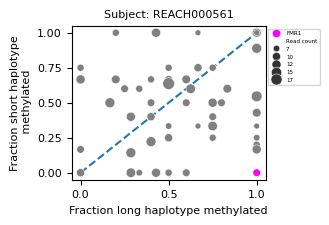

REACH000479
df_plt:


(117, 30)

plots/chrX_figs/chrX_genes_frac_hap_methyl_h1_vs_h2_logid_REACH000479.png


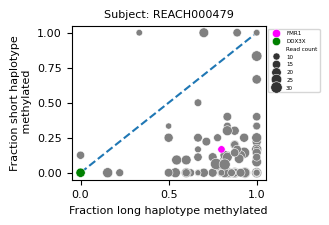

In [10]:
### plot long vs short haplotype for select subjects
#samples_plt = ['REACH000561', 'REACH000453', 'REACH000451', 'REACH000479', 'REACH000518', 'REACH000519', 
#                'REACH000234', 'REACH000365', 'REACH000436_PB', 'REACH000616', 'REACH000628', 'REACH000672', 'REACH000674', 
#                'REACH000702', 'REACH000107', 'REACH000404', 'REACH000417', 'REACH000435', 'REACH000482', 'REACH000510', 
#                'REACH000547', 'REACH000581', 'REACH000220']
samples_plt = ['REACH000561', 'REACH000479']
for sample_id in samples_plt:
    print(sample_id)
    df_plt = df_methyl_sample.loc[sample_id,:].copy()
    df_plt = df_plt.loc[(df_plt.num_reads_h1>=3) & (df_plt.num_reads_h2>=3)]
    df_plt['frac_hap_methyl_large_rep'] = df_plt['frac_hap_methyl_large_rep'].astype(float)
    df_plt['frac_hap_methyl_small_rep'] = df_plt['frac_hap_methyl_small_rep'].astype(float)
    if sample_id == 'REACH000479':
        df_tmp = pd.DataFrame({'frac_hap_methyl_large_rep': [0], 
                               'frac_hap_methyl_small_rep': [0], 
                               'region_id': ['DDX3X_5UTR'], 'Read count': [19]})
        df_plt = pd.concat([df_plt, df_tmp], axis=0)
        pass
    df_plt['color'] = 'other_genes'
    df_plt.loc[(df_plt.region_id=='FMR1_5UTR'), 'color'] = 'FMR1'
    df_plt.loc[(df_plt.region_id=='DDX3X_5UTR'), 'color'] = 'DDX3X'
    pd.set_option('display.max_columns', None)
    print('df_plt:')
    display(df_plt.shape)
    pd.set_option('display.max_columns', 10)
    
    FS = 8
    plt.figure(figsize=(2.5, 2))
    if sample_id == 'REACH000479':
        sb.scatterplot(data=df_plt, x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', size='Read count', 
                       hue='color', hue_order=['other_genes', 'FMR1', 'DDX3X'], palette=['gray', 'magenta', 'green'], zorder=2)
    else:
        sb.scatterplot(data=df_plt, x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', size='Read count', 
                       hue='color', hue_order=['other_genes', 'FMR1'], palette=['gray', 'magenta'], zorder=2)
    plt.plot([0, 1], [0, 1], '--', color=sb.color_palette()[0], zorder=1)
    plt.legend(title = '', loc='upper left', bbox_to_anchor=(1, 1), 
               handles=plt.gca().legend_.legend_handles[2:], fontsize=FS-4, title_fontsize=FS-4) #title = 'binomial phred'
    plt.xlabel('Fraction long haplotype methylated', fontsize=FS)
    plt.ylabel('Fraction short haplotype\n methylated', fontsize=FS)
    plt.xticks(fontsize=FS)
    plt.yticks(fontsize=FS)
    plt.title(f'Subject: {sample_id}', fontsize=FS)
    fig_name = f'{dir_out}/chrX_figs/chrX_genes_frac_hap_methyl_h1_vs_h2_logid_{sample_id}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
    plt.show()
    plt.close()

df_skew:


(22, 5)

,repeat_group,xci_skewness,fmr1_skewness,XCI read count,FMR1 read count
REACH000479,≥35 CGG,0.688142,0.633333,15.434783,11
REACH000518,≥35 CGG,0.327183,0.750000,10.333333,9
REACH000674,26-34 CGG,0.289933,0.500000,10.132075,9
REACH000628,26-34 CGG,0.179908,0.600000,9.081633,10
REACH000435,≤25 CGG,0.148601,0.571429,11.089552,10
REACH000510,26-34 CGG,0.112451,-0.083333,11.600000,7
REACH000547,26-34 CGG,0.085969,0.416667,10.547170,10
REACH000561,≥35 CGG,0.082252,1.000000,10.111111,9
REACH000581,≤25 CGG,0.069057,0.000000,13.756303,8
REACH000417,≤25 CGG,0.058934,0.133333,12.681319,8


plots/skewness_FMR1_vs_XCI_23Samples.png


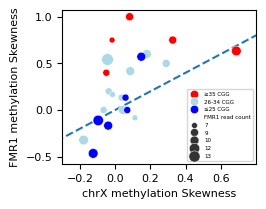

In [6]:
### compute skewness for subjects for FMR1 and XCI
samples_plt = ['REACH000561', 'REACH000453', 'REACH000451', 'REACH000479', 'REACH000518', 'REACH000519', 
                'REACH000234', 'REACH000365', 'REACH000436_PB', 'REACH000616', 'REACH000628', 'REACH000672', 'REACH000674', 
                'REACH000702', 'REACH000107', 'REACH000404', 'REACH000417', 'REACH000435', 'REACH000482', 'REACH000510', 
                'REACH000547', 'REACH000581', 'REACH000220']

### make the gray-zone subjects consistent with ≥3 read on both haplotypes
samples_plt.remove('REACH000451')

df_skew = pd.DataFrame()
df_skew['repeat_group'] = pd.Series(dtype=str)
for sample_id in samples_plt:
    #print(sample_id)
    df_plt = df_methyl_sample.loc[sample_id,:].copy()
    df_plt_xci = df_plt.loc[(df_plt.num_reads_h1>=3) & (df_plt.num_reads_h2>=3) & (df_plt.region_id!='FMR1_5UTR')].copy()
    df_plt_fmr1 = df_plt.loc[df_plt.region_id=='FMR1_5UTR'].copy()
    df_plt_xci['skewness'] = df_plt_xci.frac_hap_methyl_large_rep.astype(float) - df_plt_xci.frac_hap_methyl_small_rep.astype(float)
    df_plt_fmr1['skewness'] = df_plt_fmr1.frac_hap_methyl_large_rep.astype(float) - df_plt_fmr1.frac_hap_methyl_small_rep.astype(float)
    repeat_group = df_plt_fmr1.repeat_group.values[0]
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', 10)

    df_skew.loc[sample_id, 'xci_skewness'] = df_plt_xci['skewness'].mean()
    df_skew.loc[sample_id, 'fmr1_skewness'] = df_plt_fmr1['skewness'].mean()
    df_skew.loc[sample_id, 'repeat_group'] = repeat_group
    df_skew.loc[sample_id, 'XCI read count'] = df_plt_xci['Read count'].mean()
    df_skew.loc[sample_id, 'FMR1 read count'] = df_plt_fmr1['Read count'].mean().astype(int)

df_skew['FMR1 read count'] = df_skew['FMR1 read count'].astype(int)

pd.set_option('display.max_columns', None)
print('df_skew:')
display(df_skew.shape)
display(df_skew.sort_values('xci_skewness', ascending=False))
pd.set_option('display.max_columns', 10)

FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_skew, x='xci_skewness', y='fmr1_skewness', hue='repeat_group', 
               hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red',  'lightblue', 'blue'], size='FMR1 read count', zorder=2)
plt.plot([-.5,1],[-.5,1], '--', color=sb.color_palette()[0], zorder=1)
plt.legend(title = '', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[1:], fontsize=FS-4, title_fontsize=FS-4)
plt.xlabel('chrX methylation Skewness', fontsize=FS)
plt.ylabel('FMR1 methylation Skewness', fontsize=FS)
plt.xticks([-.2,0,0.2,0.4,0.6],fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlim((-0.3, .8))
fig_name = f'{dir_out}/skewness_FMR1_vs_XCI_23Samples.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

../data/allelic_counts_per_sample.tsv
df_rna_flt:


,condition,person,reads to G allele,reads to A allele,mean_repeat_length_h1,mean_repeat_length_h2,mean_long_rep,mean_short_rep,frac_hap_methyl_long_rep,frac_hap_methyl_short_rep,frac_hap_methyl_h1,frac_hap_methyl_h2,A_allele_hap,frac_hap_methyl_a,frac_hap_methyl_g,methyl_ratio_a_g,log_methyl_ratio_a_g,methyl_ratio_short_long,log_methyl_ratio_short_long,count_long_al,count_short_al,count_ratio_short_long,log_count_ratio_short_long,count_ratio_a_g,log_count_ratio_a_g,skewness_methyl,mean_repeat_length_ratio_short_long,log_mean_repeat_length_ratio_short_long,mean_repeat_length_a,mean_repeat_length_g,mean_repeat_length_ratio_a_g,log_mean_repeat_length_ratio_a_g
0,control,REACH000523,204885,106657,20.833333333333332,29.444444444444443,29.444444,20.833333,0.250000,1.0,1.0,0.25,H2,0.250000,1.00,0.625000,-0.678072,1.600000,0.678072,106657,204885,1.920971,0.941836,0.520570,-0.941836,-0.750000,0.707547,-0.499102,29.444444,20.833333,1.413333,0.499102
2,control,REACH000578,275959,125894,28.4,26.0,28.400000,26.000000,0.666667,0.5,0.6666666666666666,0.5,H1,0.666667,0.50,1.111111,0.152003,0.900000,-0.152003,125894,275959,2.191995,1.132244,0.456205,-1.132244,0.166667,0.915493,-0.127379,28.400000,26.000000,1.092308,0.127379
4,control,REACH000581,227727,181276,31.5,23.75,31.500000,23.750000,0.500000,0.5,0.5,0.5,H1,0.500000,0.50,1.000000,0.000000,1.000000,0.000000,181276,227727,1.256245,0.329117,0.796023,-0.329117,0.000000,0.753968,-0.407424,31.500000,23.750000,1.326316,0.407424
8,control,REACH000654,143387,156465,30.0,29.0,30.000000,29.000000,0.000000,0.0,0.0,0.0,H2,0.000000,0.00,1.000000,0.000000,1.000000,0.000000,143387,156465,1.091208,0.125926,1.091208,0.125926,0.000000,0.966667,-0.048910,29.000000,30.000000,0.966667,-0.048910
1,pre_repeat_grayzone,REACH000451,271858,97627,28.8,49.4,49.400000,28.800000,1.000000,0.2,0.2,1.0,H2,1.000000,0.20,1.666667,0.736966,0.600000,-0.736966,97627,271858,2.784660,1.477501,0.359110,-1.477501,0.800000,0.582996,-0.778442,49.400000,28.800000,1.715278,0.778442
3,pre_repeat_grayzone,REACH000453,97770,278421,31.2,49.4,49.400000,31.200000,1.000000,0.6,0.6,1.0,H2,1.000000,0.60,1.250000,0.321928,0.800000,-0.321928,278421,97770,0.351159,-1.509804,2.847714,1.509804,0.400000,0.631579,-0.662965,49.400000,31.200000,1.583333,0.662965
5,pre_repeat_grayzone,REACH000518,130854,225340,35.0,29.444444444444443,35.000000,29.444444,0.750000,0.0,0.75,0.0,H2,0.000000,0.75,0.571429,-0.807355,0.571429,-0.807355,130854,225340,1.722072,0.784145,1.722072,0.784145,0.750000,0.841270,-0.249359,29.444444,35.000000,0.841270,-0.249359
7,pre_repeat_grayzone,REACH000561,194706,99818,28.25,49.111111111111114,49.111111,28.250000,1.000000,0.0,0.0,1.0,H2,1.000000,0.00,2.000000,1.000000,0.500000,-1.000000,99818,194706,1.950610,0.963925,0.512660,-0.963925,1.000000,0.575226,-0.797799,49.111111,28.250000,1.738446,0.797799
9,pre_repeat_grayzone,REACH000563,168340,144723,26.375,49.111111111111114,49.111111,26.375000,0.750000,0.0,0.0,0.75,H2,0.750000,0.00,1.750000,0.807355,0.571429,-0.807355,144723,168340,1.163188,0.218084,0.859707,-0.218084,0.750000,0.537048,-0.896878,49.111111,26.375000,1.862033,0.896878


one sample test if log of short/long counts are different than 0:
t-statistic: 1.6989060357737962
p-value: 0.12776422806301974
one sample test if log of A/G counts are different than 0:
t-statistic: -0.9055434542846761
p-value: 0.3916335081132145
two sample test if the log of short/long count are different between gray-zones and controls:
t-statistic: -0.431885624951453
p-value: 0.6820083717038894
Geometric Mean gray-zone: 1.3074631723223378
Multiplicative SD factor gray-zone: 2.2218402443857324
Arighmatic Mean gray-zone: 1.594337696494263
SD gray-zone: 0.9071241971966341
Geometric Mean control: 1.5500135435461726
Multiplicative SD factor control: 1.3957135576491488
Arighmatic Mean control: 1.6151045369671952
SD control: 0.5258659622373909
plots/RNA_exp_ration_short_long.png


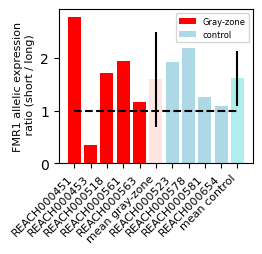

In [12]:
### Allele-specific FMR1 mRNA expression
file_name = '../data/allelic_counts_per_sample.tsv'
print(file_name)
df_rna = pd.read_table(file_name, sep='\t', index_col=None, header=0)

df_rna['mean_repeat_length_h1'] = df_rna.person.map(df_methyl.mean_repeat_length_h1)
df_rna['mean_repeat_length_h2'] = df_rna.person.map(df_methyl.mean_repeat_length_h2)
df_rna['mean_long_rep'] = df_rna.person.map(df_methyl.mean_large_rep)
df_rna['mean_short_rep'] = df_rna.person.map(df_methyl.mean_small_rep)
df_rna['frac_hap_methyl_long_rep'] = df_rna.person.map(df_methyl.frac_hap_methyl_large_rep)
df_rna['frac_hap_methyl_short_rep'] = df_rna.person.map(df_methyl.frac_hap_methyl_small_rep)
df_rna['frac_hap_methyl_h1'] = df_rna.person.map(df_methyl.frac_hap_methyl_h1)
df_rna['frac_hap_methyl_h2'] = df_rna.person.map(df_methyl.frac_hap_methyl_h2)
### dictionary which shows the A SNP is on which haplotype for each subject. Comes from IGV investigation.
a_allele_dict = {'REACH000523': 'H2', 'REACH000451': 'H2', 'REACH000578': 'H1', 'REACH000453': 'H2', 'REACH000581': 'H1', 'REACH000284': '.', 
                 'REACH000518': 'H2', 'REACH000561': 'H2', 'REACH000654': 'H2', 'REACH000563': 'H2', 'REACH000155': 'H2', 'REACH000449': 'H1', }
df_rna['A_allele_hap'] = df_rna.person.map(a_allele_dict)

df_rna_flt = df_rna.loc[(df_rna.mean_repeat_length_h1 != '.')&(df_rna.mean_repeat_length_h2 != '.')&(df_rna.A_allele_hap != '.')].copy()

df_rna_flt['frac_hap_methyl_long_rep'] = df_rna_flt['frac_hap_methyl_long_rep'].astype(float)
df_rna_flt['frac_hap_methyl_short_rep'] = df_rna_flt['frac_hap_methyl_short_rep'].astype(float)

def get_long_short_count(row):
    if row.mean_repeat_length_h1 >= row.mean_repeat_length_h2: ### if H1 is the long one
        if row.A_allele_hap == 'H1': ### if H1 is A
            long_al = 'A'
            short_al = 'G'
        else: ### if H1 is G
            long_al = 'G'
            short_al = 'A'
    else: ### if H2 is the long one
        if row.A_allele_hap == 'H1': ### if H2 is G
            long_al = 'G'
            short_al = 'A'
        else: ### if H2 is A
            long_al = 'A'
            short_al = 'G'
    return row[f'reads to {long_al} allele'], row[f'reads to {short_al} allele']

def get_a_g_frac(row):
    ### returns frac_a, frac_g
    if row.A_allele_hap == 'H1': ### if H1 is A
        return row['frac_hap_methyl_h1'], row['frac_hap_methyl_h2']
    elif row.A_allele_hap == 'H2': ### if H2 is A
        return row['frac_hap_methyl_h2'], row['frac_hap_methyl_h1']
    else:
        return '.', '.'

def get_a_g_rep_length(row):
    ### returns rep_len_a, rep_len_g
    if row.A_allele_hap == 'H1': ### if H1 is A
        return row['mean_repeat_length_h1'], row['mean_repeat_length_h2']
    elif row.A_allele_hap == 'H2': ### if H2 is A
        return row['mean_repeat_length_h2'], row['mean_repeat_length_h1']
    else:
        return '.', '.'

df_rna_flt[['frac_hap_methyl_a', 'frac_hap_methyl_g']] = df_rna_flt.apply(lambda row: get_a_g_frac(row), axis=1, result_type='expand')
df_rna_flt['frac_hap_methyl_a'] = df_rna_flt['frac_hap_methyl_a'].astype(float)
df_rna_flt['frac_hap_methyl_g'] = df_rna_flt['frac_hap_methyl_g'].astype(float)
df_rna_flt['methyl_ratio_a_g'] = (df_rna_flt.frac_hap_methyl_a + 1) / (df_rna_flt.frac_hap_methyl_g + 1)
df_rna_flt['log_methyl_ratio_a_g'] = df_rna_flt['methyl_ratio_a_g'].map(np.log2)
df_rna_flt['methyl_ratio_short_long'] = (df_rna_flt.frac_hap_methyl_short_rep + 1) / (df_rna_flt.frac_hap_methyl_long_rep + 1)
df_rna_flt['log_methyl_ratio_short_long'] = df_rna_flt['methyl_ratio_short_long'].map(np.log2)
df_rna_flt[['count_long_al', 'count_short_al']] = df_rna_flt.apply(lambda row: get_long_short_count(row), axis=1, result_type='expand')
df_rna_flt['count_ratio_short_long'] = df_rna_flt.count_short_al / df_rna_flt.count_long_al
df_rna_flt['log_count_ratio_short_long'] = df_rna_flt['count_ratio_short_long'].map(np.log2)
df_rna_flt['count_ratio_a_g'] = df_rna_flt['reads to A allele'] / df_rna_flt['reads to G allele']
df_rna_flt['log_count_ratio_a_g'] = df_rna_flt['count_ratio_a_g'].map(np.log2)
df_rna_flt['skewness_methyl'] = df_rna_flt.frac_hap_methyl_long_rep.astype(float) - df_rna_flt.frac_hap_methyl_short_rep.astype(float)
df_rna_flt = df_rna_flt.sort_values(by=['condition', 'person'])

df_rna_flt['mean_long_rep'] = df_rna_flt['mean_long_rep'].astype(float)
df_rna_flt['mean_short_rep'] = df_rna_flt['mean_short_rep'].astype(float)
df_rna_flt['mean_repeat_length_ratio_short_long'] = df_rna_flt['mean_short_rep'] / df_rna_flt['mean_long_rep']
df_rna_flt['log_mean_repeat_length_ratio_short_long'] = df_rna_flt['mean_repeat_length_ratio_short_long'].map(np.log2)
df_rna_flt[['mean_repeat_length_a', 'mean_repeat_length_g']] = df_rna_flt.apply(lambda row: get_a_g_rep_length(row), axis=1, result_type='expand')
df_rna_flt['mean_repeat_length_a'] = df_rna_flt['mean_repeat_length_a'].astype(float)
df_rna_flt['mean_repeat_length_g'] = df_rna_flt['mean_repeat_length_g'].astype(float)
df_rna_flt['mean_repeat_length_ratio_a_g'] = df_rna_flt.mean_repeat_length_a / df_rna_flt.mean_repeat_length_g
df_rna_flt['log_mean_repeat_length_ratio_a_g'] = df_rna_flt['mean_repeat_length_ratio_a_g'].map(np.log2)

print('df_rna_flt:')
pd.set_option('display.max_columns', None)
display(df_rna_flt)
pd.set_option('display.max_columns', 10)

### t-test to test if the log ratio 
# One-sample t-test: is mean(log_ratios) significantly different from 0?
from scipy.stats import ttest_1samp
print('one sample test if log of short/long counts are different than 0:')
t_stat, p_value = ttest_1samp(df_rna_flt['log_count_ratio_short_long'], popmean=0)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# One-sample t-test: is mean(log_ratios) significantly different from 0?
print('one sample test if log of A/G counts are different than 0:')
t_stat, p_value = ttest_1samp(df_rna_flt['log_count_ratio_a_g'], popmean=0)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Two-sample t-test
from scipy.stats import ttest_ind
print('two sample test if the log of short/long count are different between gray-zones and controls:')
log_A = df_rna_flt.loc[df_rna_flt.condition=='pre_repeat_grayzone']['log_count_ratio_short_long']
log_B = df_rna_flt.loc[df_rna_flt.condition=='control']['log_count_ratio_short_long']
t_stat, p_value = ttest_ind(log_A, log_B, equal_var=False)  # Welch’s t-test (default)
print("t-statistic:", t_stat)
print("p-value:", p_value)

### compute the mean and std of the ratios of counts for gray-zone subjects
ratios = df_rna_flt.loc[df_rna_flt.condition=='pre_repeat_grayzone']['count_ratio_short_long']
log_ratios = np.log(ratios)
mean_log = np.mean(log_ratios)
std_log = np.std(log_ratios, ddof=1)
# Convert back to multiplicative scale
geo_mean_grayzone = np.exp(mean_log)
geo_std_factor_grayzone = np.exp(std_log)  # multiplicative "standard deviation" factor
print("Geometric Mean gray-zone:", geo_mean_grayzone)
print("Multiplicative SD factor gray-zone:", geo_std_factor_grayzone)
mean_grayzone = np.mean(ratios)
std_grayzone = np.std(ratios, ddof=1)
print("Arighmatic Mean gray-zone:", mean_grayzone)
print("SD gray-zone:", std_grayzone)

### compute the mean and std of the ratios of counts for control subjects
ratios = df_rna_flt.loc[df_rna_flt.condition=='control']['count_ratio_short_long']
log_ratios = np.log(ratios)
mean_log = np.mean(log_ratios)
std_log = np.std(log_ratios, ddof=1)
# Convert back to multiplicative scale
geo_mean_control = np.exp(mean_log)
geo_std_factor_control = np.exp(std_log)  # multiplicative "standard deviation" factor
print("Geometric Mean control:", geo_mean_control)
print("Multiplicative SD factor control:", geo_std_factor_control)
mean_control = np.mean(ratios)
std_control = np.std(ratios, ddof=1)
print("Arighmatic Mean control:", mean_control)
print("SD control:", std_control)

FS = 8
plt.figure(figsize=(2.5, 2))
df_tmp = df_rna_flt.loc[df_rna_flt.condition=='pre_repeat_grayzone']
x = df_tmp.person
y = df_tmp.count_ratio_short_long
plt.bar(x, height=y, label='Gray-zone', color='red')
plt.bar(['mean gray-zone'], height=[mean_grayzone], yerr=std_grayzone, color='mistyrose')

df_tmp = df_rna_flt.loc[df_rna_flt.condition=='control']
x = df_tmp.person
y = df_tmp.count_ratio_short_long
plt.bar(x, height=y, label='control', color='lightblue')
plt.bar(['mean control'], height=[mean_control], yerr=std_control, color='paleturquoise')

plt.plot([0, 10], [1, 1], '--k')
plt.ylabel('FMR1 allelic expression\n ratio (short / long)', fontsize=FS)
plt.xticks(rotation=45, ha='right', fontsize=FS)
plt.legend(fontsize=FS-2, title_fontsize=FS-2)
fig_name = f'{dir_out}/RNA_exp_ration_short_long.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()